# **Proyek UTS PSD**

Dokumentasi ini menjelaskan dua alur kerja (workflow) analisis data yang dilakukan pada dataset E. coli menggunakan KNIME Analytics Platform dan PostgreSQL. Proyek ini fokus pada dua topik utama: deteksi data anomali (outlier detection) dan penanganan dataset klasifikasi tidak seimbang (imbalanced dataset handling).

---

#### 🧾 **Informasi Umum**

* **Dataset:** E. coli (UCI Machine Learning Repository)
* **Tools:** KNIME Analytics Platform, PostgreSQL
* **Nama:** Moch Sigit Aringga
* **NIM:** 230411100104

---

### ⚙️ **Workflow 1: Deteksi Outlier (Outlier Detection)**

#### 🎯 **Tujuan**

Workflow ini bertujuan untuk mengidentifikasi, menandai, dan memvisualisasikan data anomali (outlier) pada fitur numerik dataset E. coli. Deteksi outlier dilakukan untuk memastikan kualitas data dan mencegah data ekstrem memengaruhi hasil model.

---

#### 🧩 **Diagram Alur Kerja**

Alur kerja dirancang untuk:

1. Mengambil data dari PostgreSQL.
2. Melakukan pembersihan data.
3. Mendeteksi dan menandai outlier.
4. Memvisualisasikan hasil secara interaktif.

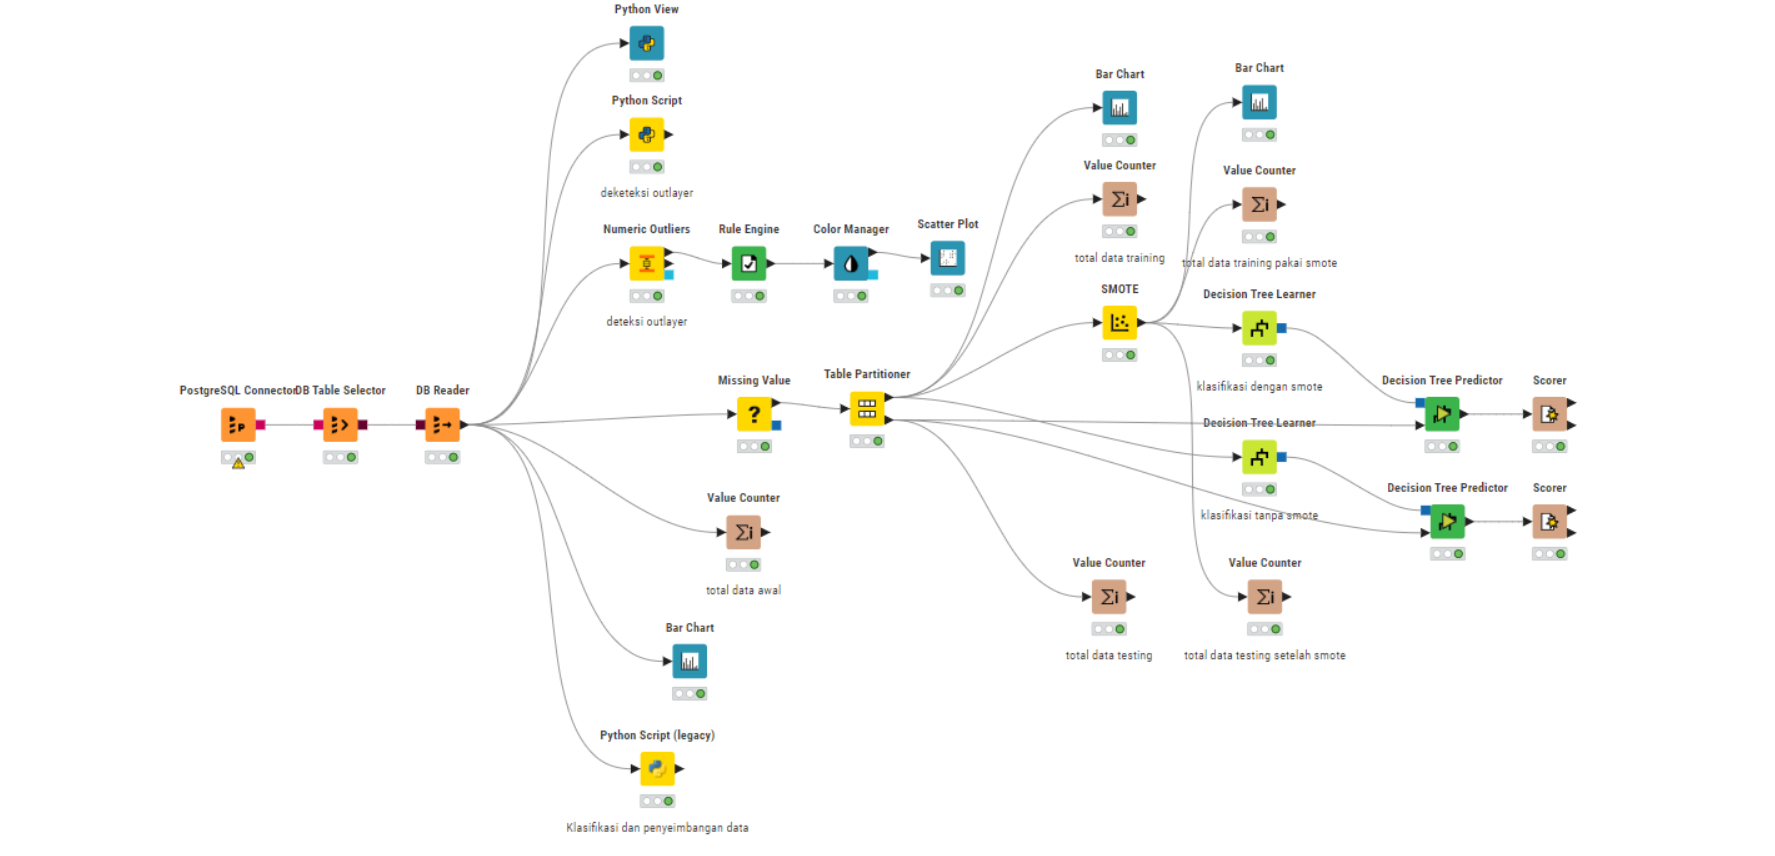

---

#### 🔍 **Langkah-langkah Analisis**

1. **Pengambilan Data (DB Reader)**

   * Data diambil dari database PostgreSQL menggunakan node *DB Reader* setelah koneksi berhasil dibuat.
   * Output: Dataset mentah dari tabel E. coli.
   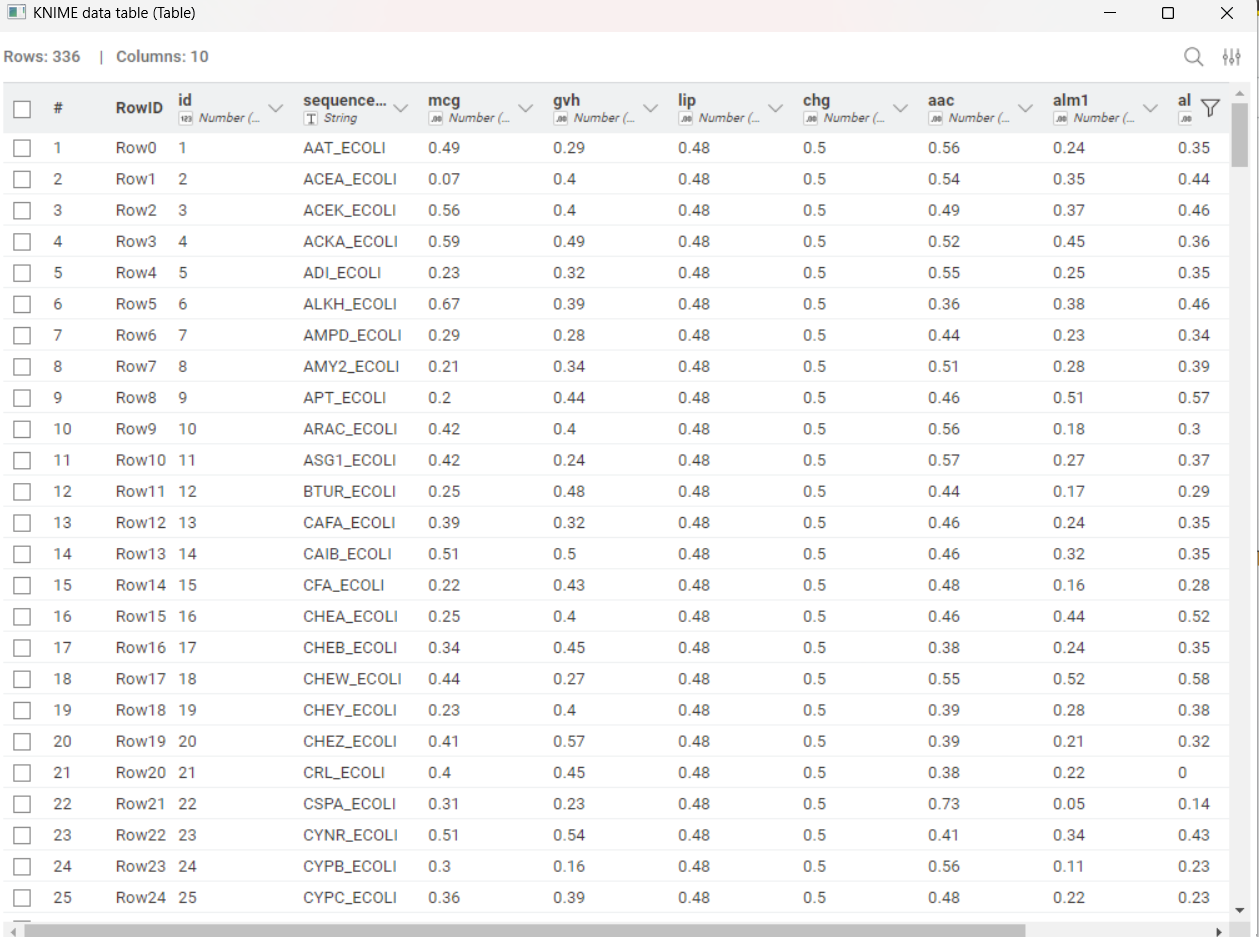

   **Berikut ini visualisasi tabel sebaran data**
   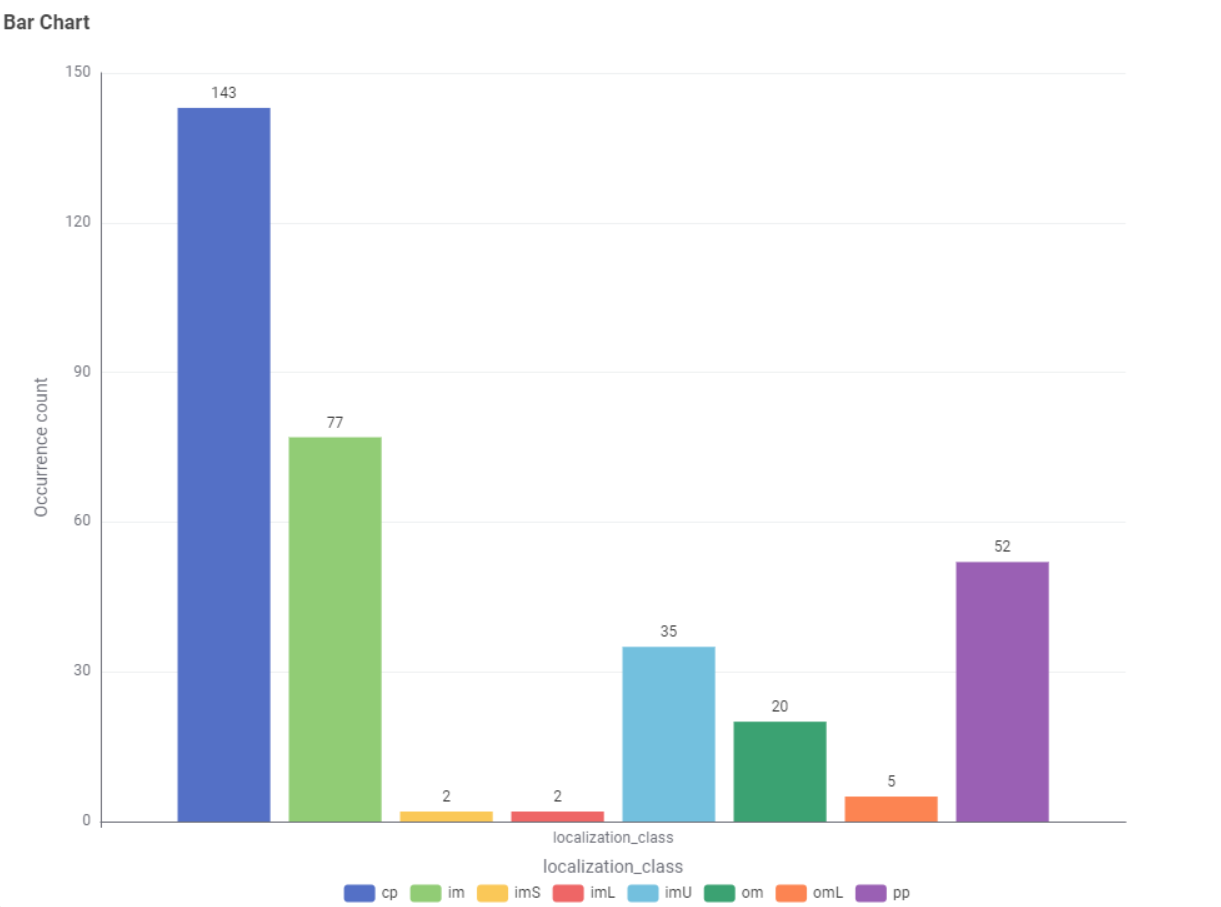

2. **Pembersihan Data (Missing Value)**

   * Mengatasi nilai kosong pada kolom numerik dengan metode **Mean Imputation** untuk mencegah error pada analisis berikutnya.

3. **Deteksi Outlier (Numeric Outliers)**

   * Metode yang digunakan: **Interquartile Range (IQR)**.
   * Data di luar rentang `Q1 - 1.5*IQR` dan `Q3 + 1.5*IQR` ditandai sebagai outlier, lalu diubah menjadi nilai *missing*.
   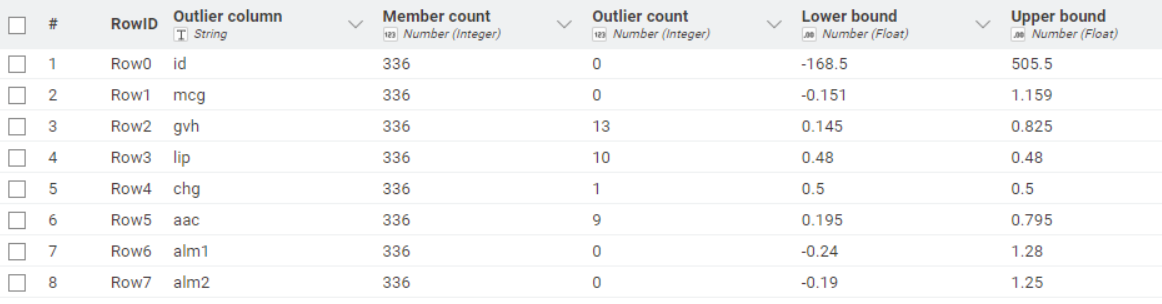

4. **Pembuatan Penanda (Rule Engine)**

   * Membuat kolom baru `prediction` untuk menandai data yang merupakan outlier (`True`) dan data normal (`False`).
   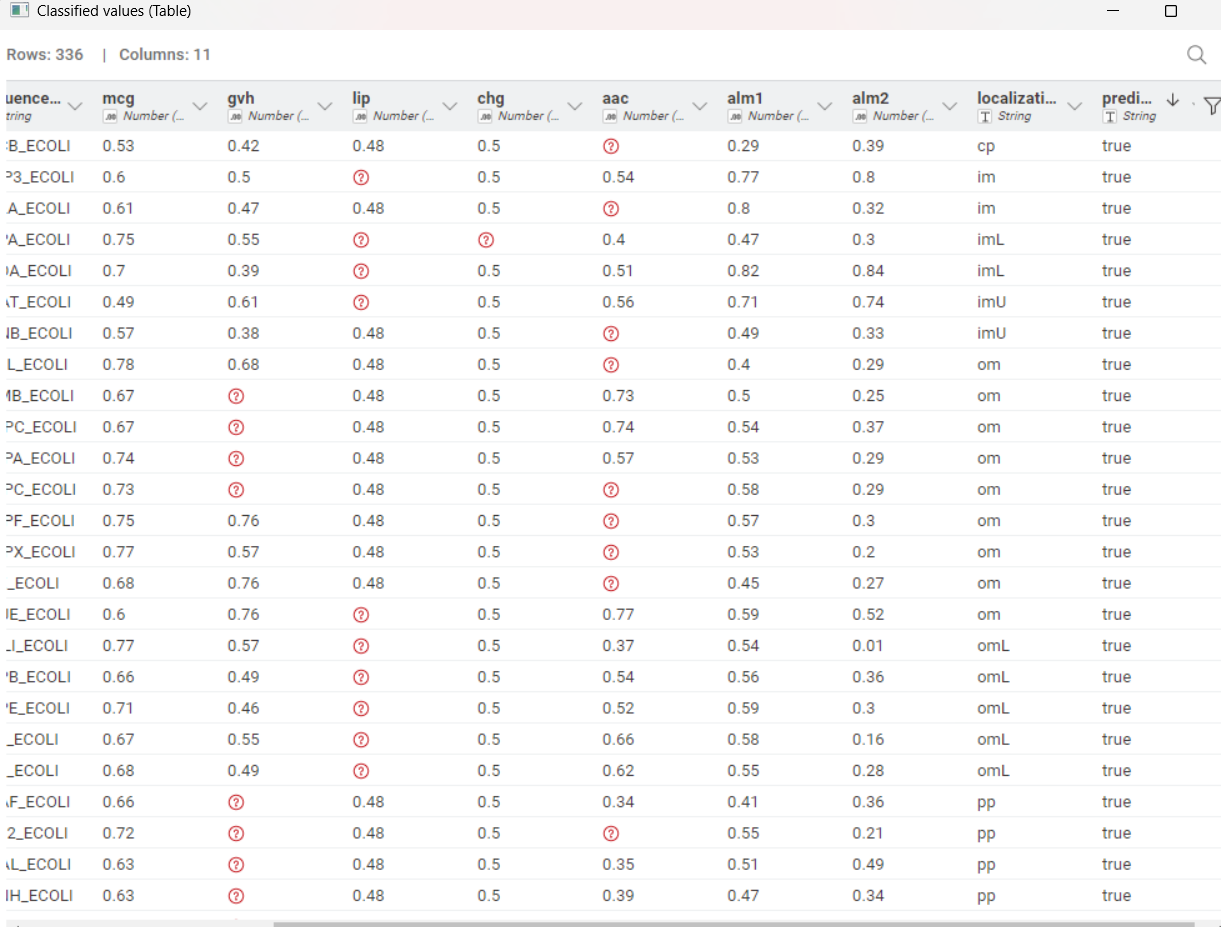

5. **Pewarnaan Data (Color Manager)**

   * Data diberi warna berdasarkan kolom `prediction`: merah untuk outlier dan biru untuk data normal.

6. **Visualisasi (Scatter Plot)**

   * Menggunakan *Scatter Plot* untuk menampilkan distribusi data. Titik merah (outlier) terlihat jelas terpisah dari data utama.
   

---

#### 📊 **Hasil dan Interpretasi**

Visualisasi Scatter Plot memperlihatkan persebaran data dengan jelas. Outlier yang diberi warna merah menonjol di luar pola data utama. Hal ini menunjukkan bahwa metode **IQR** efektif dalam mendeteksi data ekstrem yang berpotensi memengaruhi model klasifikasi di tahap selanjutnya.

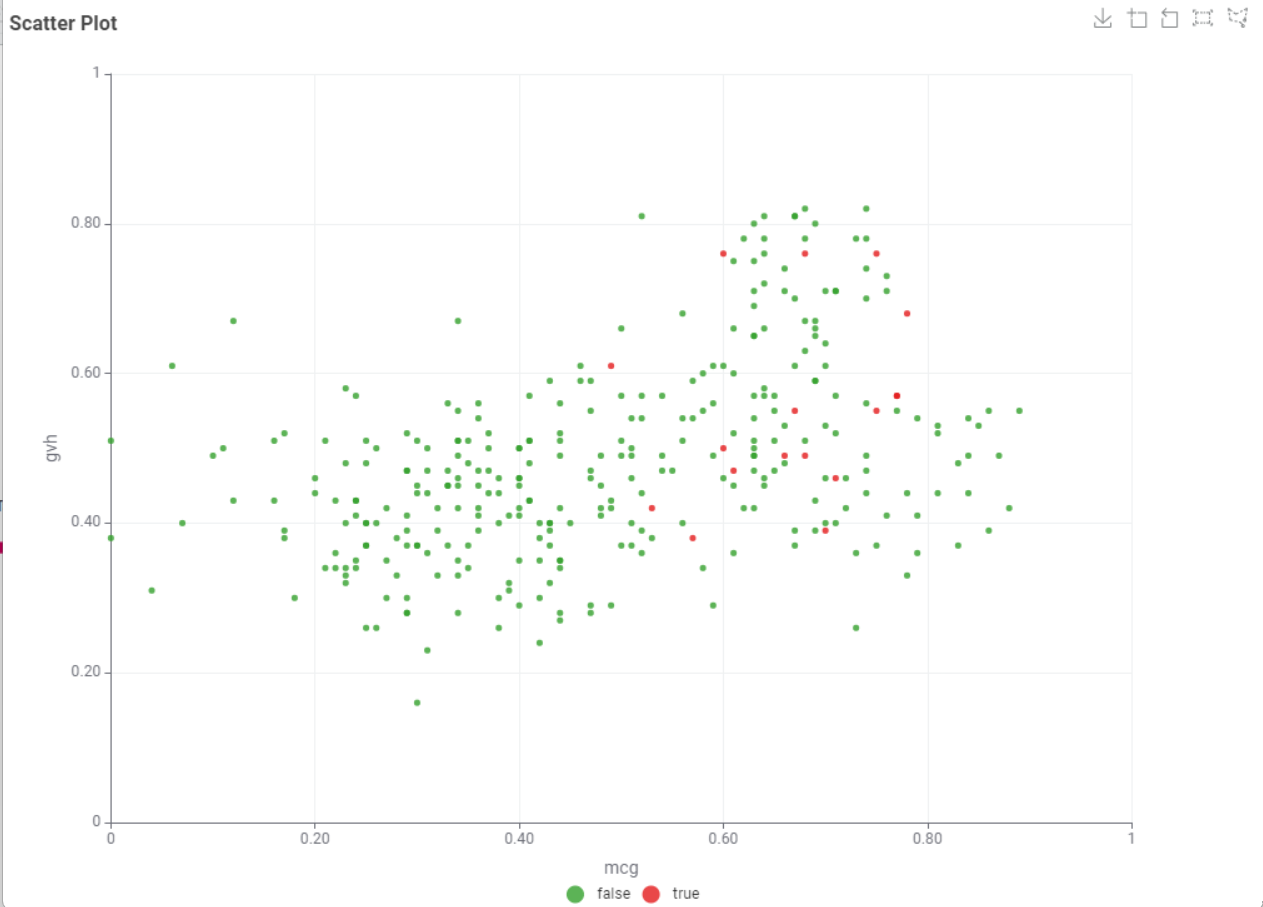

---

### ⚖️ **Workflow 2: Analisis Dataset Tidak Seimbang (Unbalanced Dataset)**

#### 🎯 **Tujuan**

Workflow ini menunjukkan permasalahan klasifikasi pada dataset tidak seimbang dan membuktikan efektivitas teknik **SMOTE (Synthetic Minority Over-sampling Technique)** untuk meningkatkan performa model Decision Tree.

---

#### 🧠 **Masalah Ketidakseimbangan Data**

Dataset E. coli memiliki 8 kelas target (`localization_class`) dengan distribusi yang tidak merata. Kelas mayoritas seperti `cp` memiliki jumlah sampel jauh lebih banyak dibandingkan kelas minoritas seperti `imS` atau `imL`. Akibatnya, model klasifikasi cenderung bias terhadap kelas mayoritas.

**[Sisipkan gambar output Value Counter yang menampilkan distribusi kelas di sini]**

---

#### 🧩 **Diagram Alur Kerja**

Workflow ini terdiri dari dua cabang paralel untuk membandingkan hasil klasifikasi **tanpa balancing** dan **dengan SMOTE balancing**.

**[Sisipkan gambar workflow unbalanced dataset di sini]**

---

#### 🔍 **Langkah-langkah Analisis**

1. **Persiapan Data**

   * Data dibersihkan dari *missing value* dan kolom target (`localization_class`) dikonversi ke tipe *Nominal* menggunakan node *String to Nominal*.

2. **Pembagian Data (Table Partitioner)**

   * Dataset dibagi menjadi 70% data training dan 30% data testing untuk menjaga konsistensi evaluasi.

   **sebaran data training**
   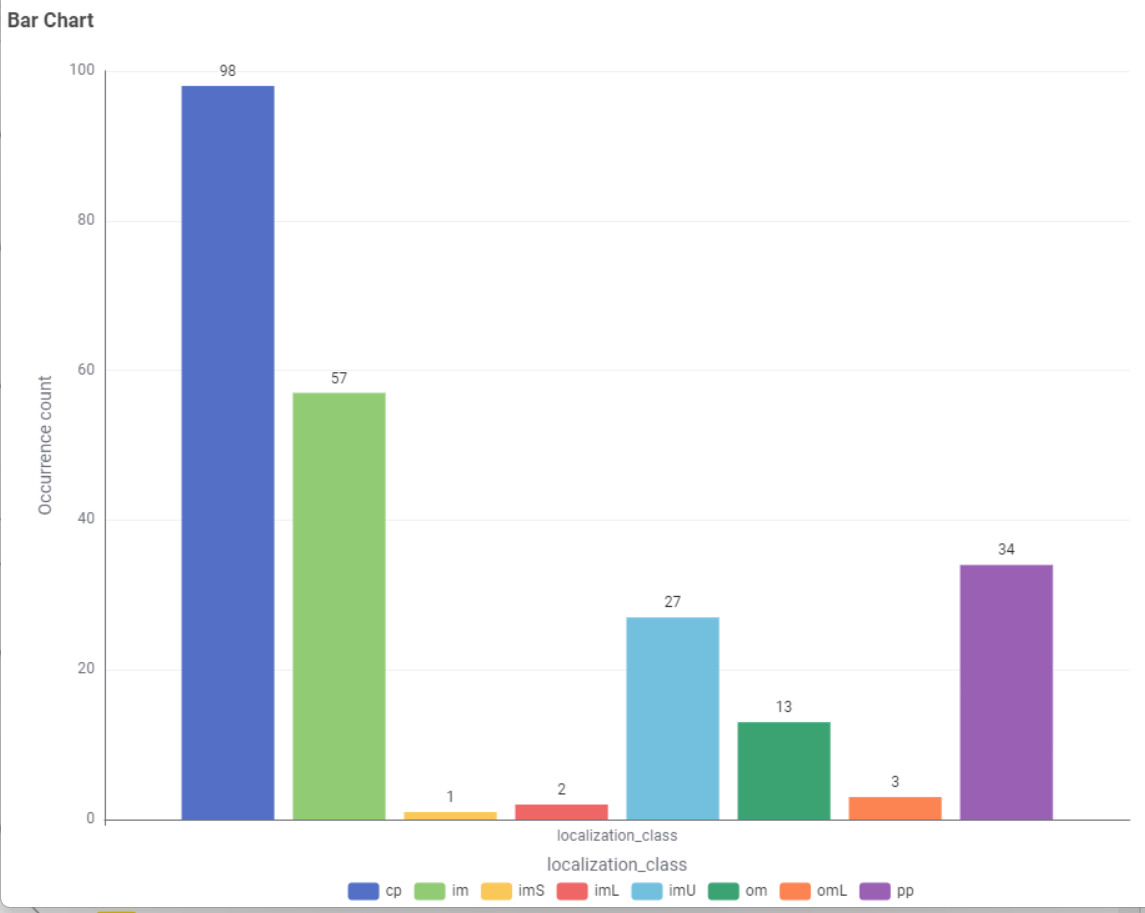

---
**Sebaran data testing**
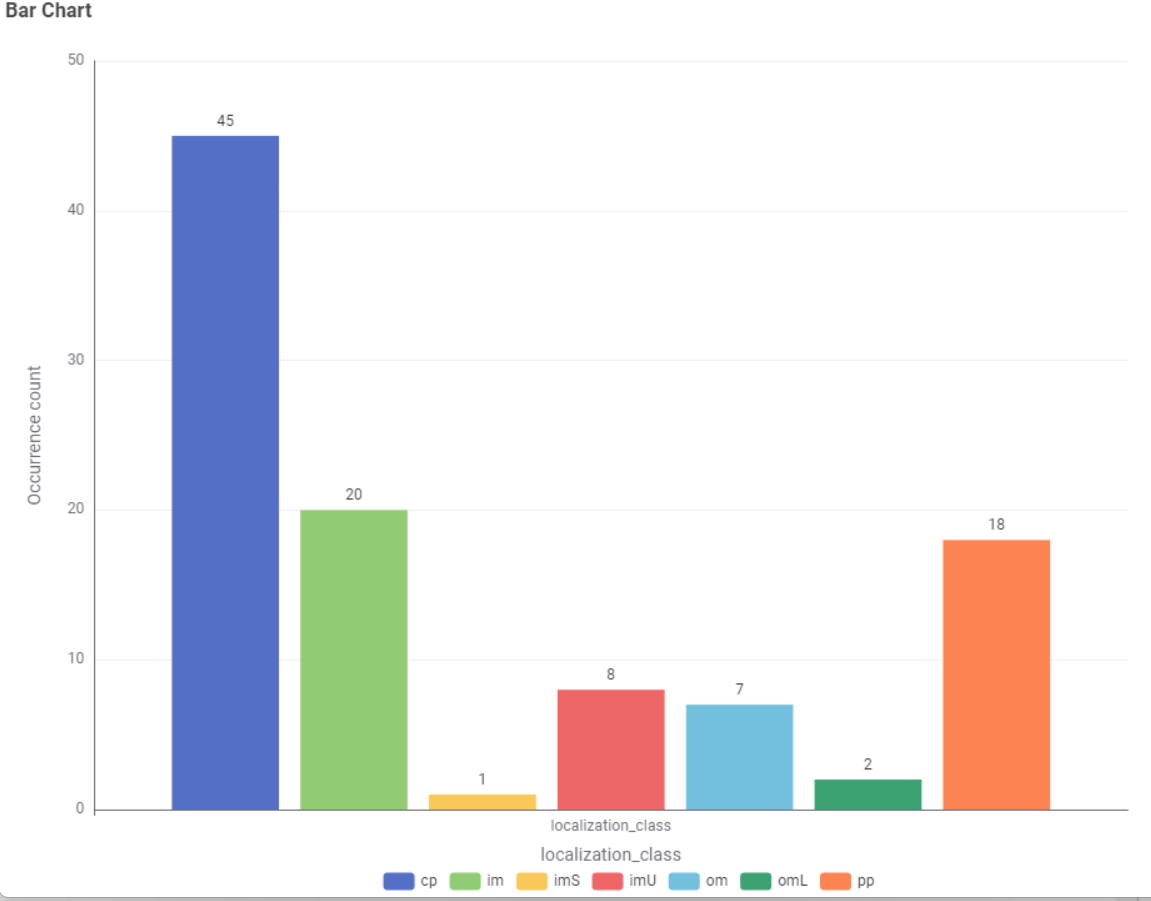


3. **Alur A – Tanpa Balancing:**

   * Model Decision Tree dilatih langsung dengan data training asli tanpa balancing.
   * Node yang digunakan: *Decision Tree Learner → Decision Tree Predictor → Scorer*.

   **Sebaran data tanpa SMOTE**
   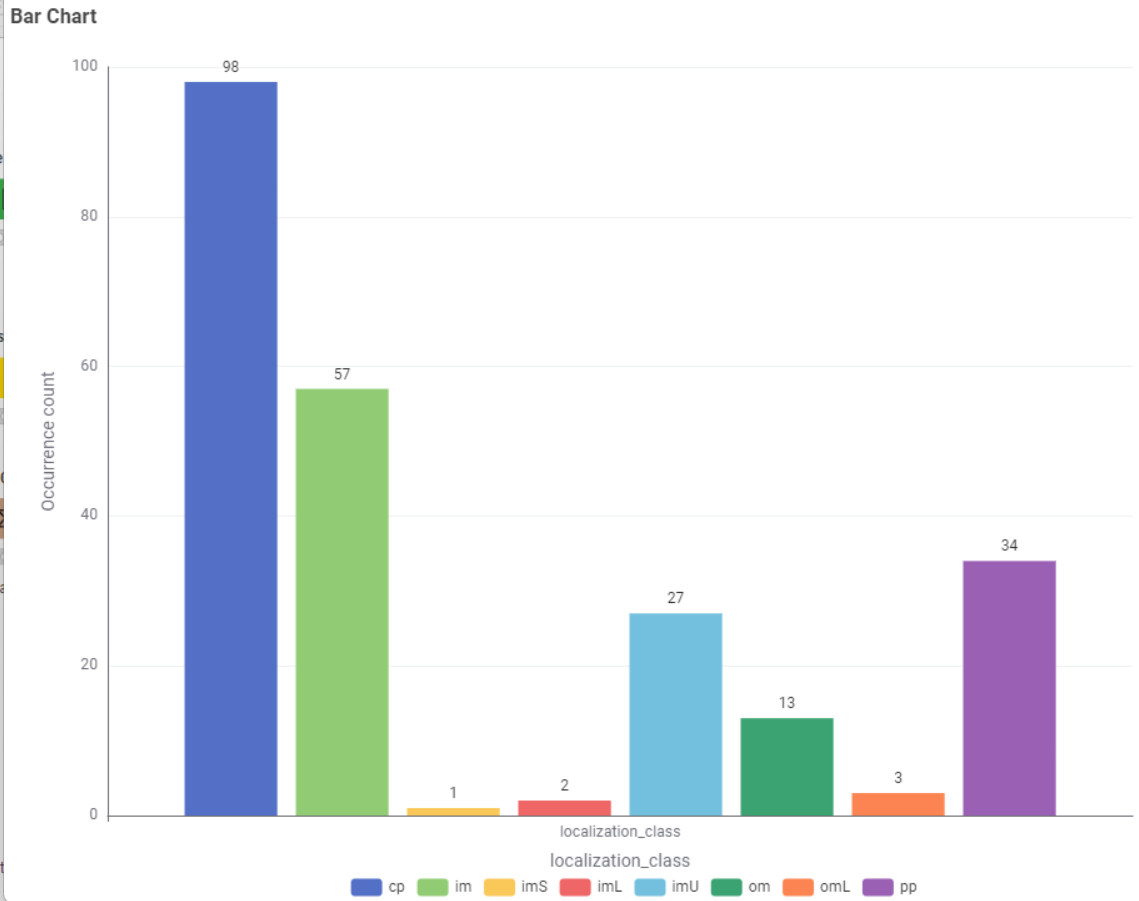

4. **Alur B – Dengan Balancing (SMOTE):**

   * Data training diseimbangkan menggunakan node *SMOTE*.
   * Teknik SMOTE menghasilkan sampel sintetis untuk kelas minoritas agar jumlahnya setara dengan kelas mayoritas.
   * Hasil data balancing digunakan untuk melatih model Decision Tree kedua.
   * Node yang digunakan: *SMOTE → Decision Tree Learner → Decision Tree Predictor → Scorer*.

   **Sebaran data training setelah SMOTE**
    

5. **Evaluasi dan Perbandingan (Scorer):**

   * Kedua model diuji dengan dataset testing yang sama.
   * Node *Scorer* menghasilkan **Confusion Matrix**, **Accuracy**, **Precision**, dan **Recall** untuk setiap model.

---

#### 📈 **Hasil dan Interpretasi**

**Model Tanpa SMOTE:**

* Akurasi keseluruhan tinggi, namun model gagal mengenali sebagian besar sampel kelas minoritas.
* Confusion Matrix menunjukkan nilai diagonal rendah pada kelas minoritas.

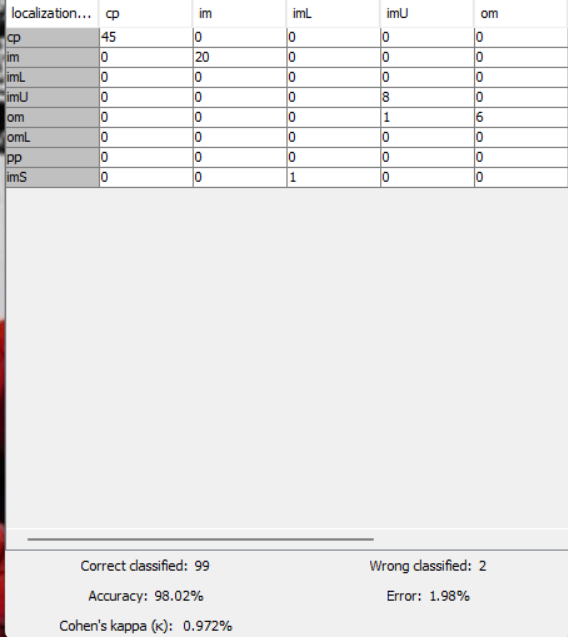

**Model Dengan SMOTE:**

* Performa meningkat signifikan pada kelas minoritas (nilai recall dan precision naik).
* Model lebih adil dalam mengenali seluruh kelas.

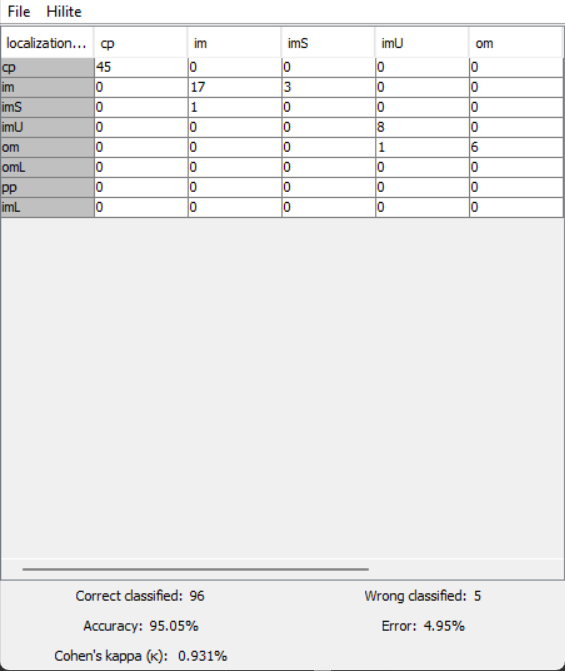

**Kesimpulan:** Teknik SMOTE berhasil meningkatkan kemampuan model Decision Tree untuk mengklasifikasikan data dari kelas minoritas, mengurangi bias, dan menghasilkan model yang lebih seimbang.

---

### 🧠 **Kesimpulan Akhir**

Proyek ini berhasil mendemonstrasikan dua aspek penting dalam proses data mining:

1. **Deteksi Outlier:** membantu memastikan integritas data dan meningkatkan kualitas input model.
2. **Penyeimbangan Data (SMOTE):** efektif meningkatkan kinerja model klasifikasi terhadap kelas minoritas.

Dengan menggunakan KNIME, seluruh proses dapat divisualisasikan secara intuitif. Hasil ini juga dibandingkan dengan implementasi menggunakan **Python Script** untuk menunjukkan kesetaraan hasil antara *visual workflow* dan *coding-based approach*.

---

## 🔗 **Referensi dan Lampiran**

* Workflow Outlier Detection KNIME Hub: https://hub.knime.com/s/R2GfgzpNbJt1iPkb

